In [41]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import mutual_info_score
from sklearn.feature_extraction import DictVectorizer
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from sklearn.model_selection import KFold


In [3]:
df=pd.read_csv(r"https://raw.githubusercontent.com/alexeygrigorev/mlbookcamp-code/master/chapter-02-car-price/data.csv")

In [4]:
a=['Make',
'Model',
'Year',
'Engine HP',
'Engine Cylinders',
'Transmission Type',
'Vehicle Style',
'highway MPG',
'city mpg',
'MSRP']

In [5]:
df=df[a]

In [6]:
df.columns = df.columns.str.replace(' ', '_').str.lower()
df.rename(columns={'msrp':'price'},inplace=True)
df['above_average'] = (df.price > df.price.mean()).astype(int)
df.fillna(0,inplace=True)

In [15]:
df_full_train, df_test = train_test_split(df, test_size=0.2, random_state=1)
df_train, df_val = train_test_split(df_full_train, test_size=0.25, random_state=1)
df_train = df_train.reset_index(drop=True)
df_val = df_val.reset_index(drop=True)
df_test = df_test.reset_index(drop=True)

y_train = df_train.above_average
y_val = df_val.above_average
y_test = df_test.above_average

del df_train['above_average']
del df_val['above_average']
del df_test['above_average']
del df_train['price']
del df_val['price']
del df_test['price']

In [16]:
num=df_train.select_dtypes(exclude='object').columns.to_list()

In [22]:
for i in num:
    auc = roc_auc_score(y_train, df_train[i])
    if auc < 0.5:
        auc = roc_auc_score(y_train, -df_train[i])
    print('%10s: %.6f' % (i, auc))

      year: 0.687551
 engine_hp: 0.917103
engine_cylinders: 0.766116
highway_mpg: 0.633059
  city_mpg: 0.673424


## Question 1:
* engine_hpm

In [ ]:
Question 2: Training the model


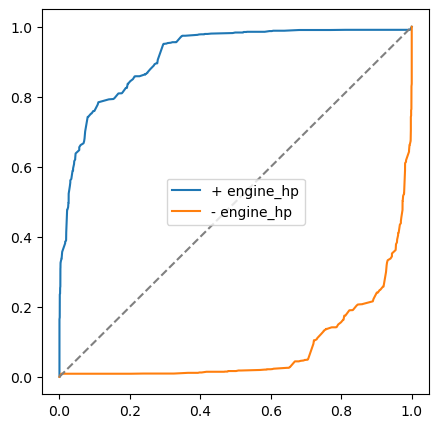

In [26]:
plt.figure(figsize=(5, 5))

fpr, tpr, _ = roc_curve(y_train, df_train.engine_hp)
plt.plot(fpr, tpr, label='+ engine_hp')

fpr, tpr, _ = roc_curve(y_train, -df_train.engine_hp)
plt.plot(fpr, tpr, label='- engine_hp')

plt.plot([0, 1], [0, 1], color='grey', linestyle='--')

plt.legend()
plt.show()

In [27]:
cat=df_train.select_dtypes(include='object').columns.to_list()

In [30]:

#@ TRAINING LOGISTIC REGRESSION MODEL:
columns = cat + num

train_dicts = df_train[columns].to_dict(orient='records')
dv = DictVectorizer(sparse=False)
X_train = dv.fit_transform(train_dicts)

model = LogisticRegression(solver='liblinear', C=1.0, max_iter=1000)
model.fit(X_train, y_train)

val_dicts = df_val[columns].to_dict(orient='records')
X_val = dv.transform(val_dicts)

y_pred = model.predict_proba(X_val)[:, 1]
roc_auc_score(y_val, y_pred)

0.9802249094861359

## Question 2 
0.9802249094861359 aprox 0.979

At which threshold precision and recall curves intersect?

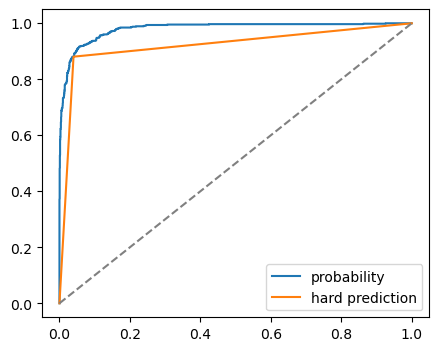

In [32]:
y_pred_bin = model.predict(X_val)
plt.figure(figsize=(5, 4))
fpr, tpr, _ = roc_curve(y_val, y_pred)
plt.plot(fpr, tpr, label='probability')
fpr, tpr, _ = roc_curve(y_val, y_pred_bin)
plt.plot(fpr, tpr, label='hard prediction')
plt.plot([0, 1], [0, 1], color='grey', linestyle='--')
plt.legend()
plt.show()

,threshold,tp,fp,fn,tn
0,0.00,654,1729,0,0
2,0.02,651,642,3,1087
4,0.04,650,495,4,1234
6,0.06,650,429,4,1300
8,0.08,646,372,8,1357
10,0.10,644,329,10,1400
12,0.12,644,298,10,1431
14,0.14,636,271,18,1458
16,0.16,633,249,21,1480
18,0.18,628,217,26,1512


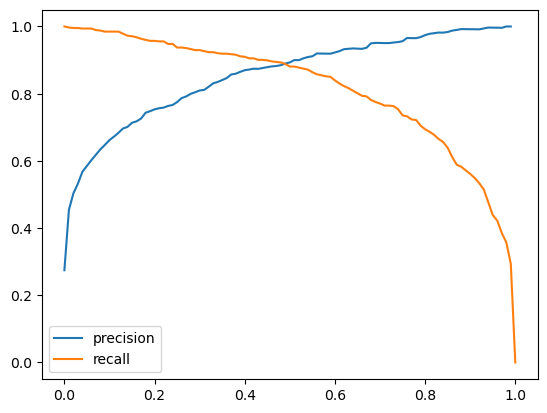

In [36]:
def confusion_matrix_dataframe(y_val, y_pred):
    scores = []

    thresholds = np.linspace(0, 1, 101)
    for t in thresholds:
        actual_positive = (y_val == 1)
        actual_negative = (y_val == 0)

        predict_positive = (y_pred >= t)
        predict_negative = (y_pred < t)
        tp = (predict_positive & actual_positive).sum()
        tn = (predict_negative & actual_negative).sum()

        fp = (predict_positive & actual_negative).sum()
        fn = (predict_negative & actual_positive).sum()

        scores.append((t, tp, fp, fn, tn))

    columns = ['threshold', 'tp', 'fp', 'fn', 'tn']
    df_scores = pd.DataFrame(scores, columns=columns)
    
    return df_scores


#@ IMPLEMENTATION OF FUNCTION:
df_scores = confusion_matrix_dataframe(y_val, y_pred)
display(df_scores[::2])

df_scores['pres'] = df_scores.tp / (df_scores.tp + df_scores.fp)
df_scores['recal'] = df_scores.tp / (df_scores.tp + df_scores.fn)
plt.plot(df_scores.threshold, df_scores.pres, label='precision')
plt.plot(df_scores.threshold, df_scores.recal, label='recall')
plt.legend()
plt.show()

## Question 3

Aprox 0.48

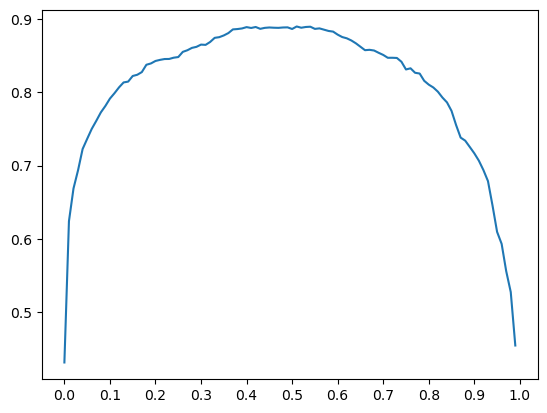

In [38]:
df_scores['f1'] = 2 * df_scores.pres * df_scores.recal / (df_scores.pres + df_scores.recal)
plt.plot(df_scores.threshold, df_scores.f1)
plt.xticks(np.linspace(0, 1, 11))
plt.show()

## Question 4
* Aprox 0.52

Question 5: 5-Fold CV

In [44]:
def train(df_train, y_train, C=1.0,max_iter=1000):
    dicts = df_train[columns].to_dict(orient='records')
    dv = DictVectorizer(sparse=False)
    X_train = dv.fit_transform(dicts)
    model = LogisticRegression(solver='liblinear', C=C)
    model.fit(X_train, y_train)
    return dv, model

def predict(df, dv, model):
    dicts = df[columns].to_dict(orient='records')
    X = dv.transform(dicts)
    y_pred = model.predict_proba(X)[:, 1]
    return y_pred

In [46]:
scores = []

kfold = KFold(n_splits=5, shuffle=True, random_state=1)

for train_idx, val_idx in kfold.split(df_full_train):
    df_train = df_full_train.iloc[train_idx]
    df_val = df_full_train.iloc[val_idx]
    y_train = df_train.above_average
    y_val = df_val.above_average

    dv, model = train(df_train, y_train, C=1.0)
    y_pred = predict(df_val, dv, model)
    auc = roc_auc_score(y_val, y_pred)
    scores.append(auc)

print('%.4f +- %.4f' % (np.mean(scores), np.std(scores)))

0.9793 +- 0.0021


## Question 5 
answer= 0.003

Question 6: Hyperparemeter Tuning


In [48]:
kfold = KFold(n_splits=5, shuffle=True, random_state=1)

for C in [0.01, 0.1, 0.5, 10]:
    scores = []

    for train_idx, val_idx in kfold.split(df_full_train):
        df_train = df_full_train.iloc[train_idx]
        df_val = df_full_train.iloc[val_idx]

        y_train = df_train.above_average
        y_val = df_val.above_average

        dv, model = train(df_train, y_train, C=C,max_iter=1000)
        y_pred = predict(df_val, dv, model)

        auc = roc_auc_score(y_val, y_pred)
        scores.append(auc)

    print('C=%4s, %.3f +- %.3f' % (C, np.mean(scores), np.std(scores)))

C=0.01, 0.952 +- 0.002
C= 0.1, 0.972 +- 0.002
C= 0.5, 0.978 +- 0.003
C=  10, 0.984 +- 0.003


In [49]:
## Answer 6
C=10

What is the most frequent observation (mode) for the column transmission_type?


In [69]:
df['transmission_type'].value_counts()

transmission_type
AUTOMATIC           8266
MANUAL              2935
AUTOMATED_MANUAL     626
DIRECT_DRIVE          68
UNKNOWN               19
Name: count, dtype: int64

What are the two features that have the biggest correlation in this dataset?

* highway_mpg and city_mpg


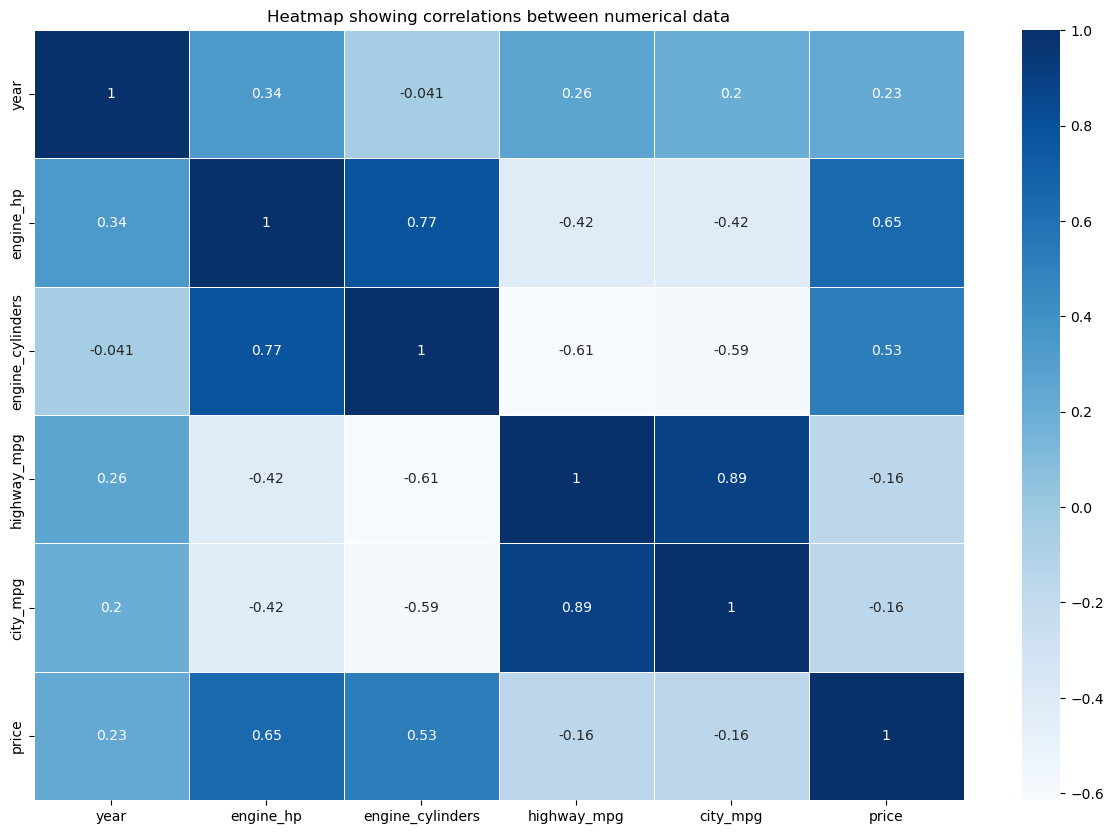

In [70]:
plt.figure(figsize=(15,10))  
sns.heatmap(df.select_dtypes(exclude='object').corr(),annot=True,linewidths=.5, cmap="Blues")
plt.title('Heatmap showing correlations between numerical data')
plt.show()

In [71]:
df.select_dtypes(exclude='object').corr()

,year,engine_hp,engine_cylinders,highway_mpg,city_mpg,price
year,1.000000,0.338714,-0.040708,0.258240,0.198171,0.227590
engine_hp,0.338714,1.000000,0.774851,-0.415707,-0.424918,0.650095
engine_cylinders,-0.040708,0.774851,1.000000,-0.614541,-0.587306,0.526274
highway_mpg,0.258240,-0.415707,-0.614541,1.000000,0.886829,-0.160043
city_mpg,0.198171,-0.424918,-0.587306,0.886829,1.000000,-0.157676
price,0.227590,0.650095,0.526274,-0.160043,-0.157676,1.000000


In [72]:
df.isna().sum()

make                 0
model                0
year                 0
engine_hp            0
engine_cylinders     0
transmission_type    0
vehicle_style        0
highway_mpg          0
city_mpg             0
price                0
dtype: int64

In [104]:
df_full_train, df_test = train_test_split(df, test_size=0.2, random_state=42)
df_train, df_val = train_test_split(df_full_train, test_size=0.25, random_state=42)
len(df_train), len(df_val), len(df_test)
df_train = df_train.reset_index(drop=True)
df_val = df_val.reset_index(drop=True)
df_test = df_test.reset_index(drop=True)
y_train = df_train.above_average.values
y_val = df_val.above_average.values
y_test = df_test.above_average.values


In [105]:
cat=df_train.select_dtypes(include='object').columns.to_list()

In [106]:
df_train

,make,model,year,engine_hp,engine_cylinders,transmission_type,vehicle_style,highway_mpg,city_mpg,price,above_average
0,Mitsubishi,Endeavor,2011,225.0,6.0,AUTOMATIC,4dr SUV,19,15,33599,0
1,Kia,Borrego,2009,276.0,6.0,AUTOMATIC,4dr SUV,21,17,26245,0
2,Lamborghini,Gallardo,2012,570.0,10.0,MANUAL,Convertible,20,12,248000,1
3,Chevrolet,Colorado,2016,200.0,4.0,AUTOMATIC,Crew Cab Pickup,27,20,24990,0
4,Pontiac,Vibe,2009,158.0,4.0,AUTOMATIC,4dr Hatchback,26,20,20475,0
...,...,...,...,...,...,...,...,...,...,...,...
7143,Toyota,Sienna,2016,266.0,6.0,AUTOMATIC,Passenger Minivan,25,18,37655,0
7144,Chevrolet,HHR,2009,260.0,4.0,MANUAL,Wagon,29,21,25135,0
7145,Hyundai,Veracruz,2012,260.0,6.0,AUTOMATIC,4dr SUV,22,17,28345,0
7146,Mitsubishi,Expo,1993,136.0,4.0,MANUAL,2dr Hatchback,26,19,2000,0


In [107]:

#@ DEFINING FUNCTION:
def calculate_mi(series):
    return mutual_info_score(series, df_train.above_average)

#@ IMPLEMENTATION:
df_mi = df_train[cat].apply(calculate_mi)
df_mi = df_mi.sort_values(ascending=False).to_frame(name='MI')
df_mi

,MI
model,0.462344
make,0.239769
vehicle_style,0.084143
transmission_type,0.020958


In [108]:
del df_train['above_average']
del df_val['above_average']
del df_test['above_average']

In [114]:
del df_train['price']
del df_val['price']
del df_test['price']

Which of these variables has the lowest mutual information score?

* answer='model'

In [115]:

num = df_train.select_dtypes(exclude='object').columns.to_list()

In [116]:
train_dict = df_train[cat + num].to_dict(orient='records')

In [117]:
dv = DictVectorizer(sparse=False)
dv.fit(train_dict)
X_train = dv.transform(train_dict)
model = LogisticRegression(solver="liblinear", C=10, max_iter=1000, random_state=42)
model.fit(X_train, y_train)

LogisticRegression(C=10, max_iter=1000, random_state=42, solver='liblinear')

In [118]:
val_dict = df_val[cat + num].to_dict(orient='records')
X_val = dv.transform(val_dict)
y_pred = model.predict(X_val)

In [119]:
accuracy = np.round(accuracy_score(y_val, y_pred),2)
print(accuracy)

0.95


In [121]:
cols=cat + num

In [123]:
orig_score = accuracy
for f in cols:
    subset = cols.copy()
    subset.remove(f)
    train_dict = df_train[subset].to_dict(orient='records')

    dv = DictVectorizer(sparse=False)
    dv.fit(train_dict)
    X_train = dv.transform(train_dict)
    model = LogisticRegression(solver='liblinear', C=1.0, max_iter=1000, random_state=42)
    model.fit(X_train, y_train)

    val_dict = df_val[subset].to_dict(orient='records')
    X_val = dv.transform(val_dict)

    y_pred = model.predict(X_val)

    score = accuracy_score(y_val, y_pred)
    print(f, orig_score - score, score)

make 0.011267310113302509 0.9387326898866974
model 0.029311791859001235 0.9206882081409987
transmission_type 0.011267310113302509 0.9387326898866974
vehicle_style 0.022597566093159882 0.9274024339068401
year 0.001195971464540424 0.9488040285354595
engine_hp 0.029311791859001235 0.9206882081409987
engine_cylinders 0.005392362568191311 0.9446076374318086
highway_mpg 0.00832983634074691 0.941670163659253
city_mpg 0.0032941670163658676 0.9467058329836341


Which of following feature has the smallest difference?

Year

%Question   5

In [127]:
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error

In [128]:
train_dict = df_train[cat + num].to_dict(orient='records')
dv = DictVectorizer(sparse=False)
dv.fit(train_dict)
X_train = dv.transform(train_dict)
val_dict = df_val[cat + num].to_dict(orient='records')
X_val = dv.transform(val_dict)

In [130]:
for a in [0, 0.01, 0.1, 1, 10]:
    model = Ridge(alpha=a, solver="sag", random_state=42)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_val)
    score = np.sqrt(mean_squared_error(y_val, y_pred))
    print(a, round(score, 6))

c:\Users\Usser\anaconda3\envs\ml-zoomcamp\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


0 0.298203


c:\Users\Usser\anaconda3\envs\ml-zoomcamp\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


0.01 0.298203


c:\Users\Usser\anaconda3\envs\ml-zoomcamp\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


0.1 0.298204


c:\Users\Usser\anaconda3\envs\ml-zoomcamp\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


1 0.298217
10 0.29835


c:\Users\Usser\anaconda3\envs\ml-zoomcamp\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
